In [77]:
import pandas as pd
import numpy as np
import os

In [78]:
project_root = os.path.abspath(os.pardir)
data_loc = os.path.join(project_root, 'data')
raw_data_loc = os.path.join(data_loc, 'raw')
titanic_training_data = os.path.join(raw_data_loc, 'train.csv')

In [79]:
df = pd.read_csv(titanic_training_data)

mean_fare = df.Fare.mean()
print('Fare mean: {0}'.format(mean_fare))

percentile_25 = df.Fare.quantile(0.25)
print('Fare 25th percentile: {0}'.format(percentile_25))

Fare mean: 32.2042079685746
Fare 25th percentile: 7.9104


## describe()
This method shows useful summary stats for the data.

In [80]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [81]:
# Includes non-numerical columns
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Millet, Mr. Francis Davis",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


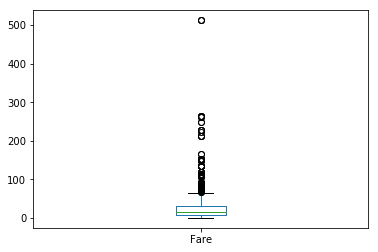

In [82]:
%matplotlib inline
df.Fare.plot(kind='box');

In [83]:
# Get a count of column values
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [84]:
# Get a snapshot of proportional composition of a column
df.Sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

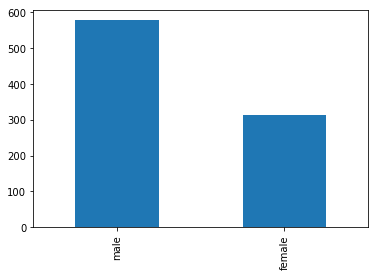

In [85]:
df.Sex.value_counts().plot(kind='bar')

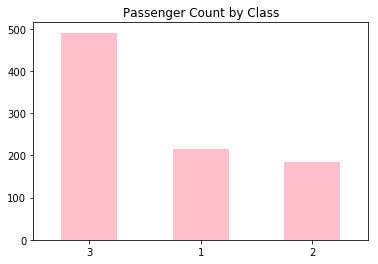

In [86]:
# Use semicolon to supress matplot object representation
# set rot to use better x axis labels ?

df.Pclass.value_counts().plot(kind='bar', rot=0, title='Passenger Count by Class', color='pink');

In [87]:
# filtering syntax...A bit odd though intuitive
df[df.Sex != 'male'].Sex.value_counts()

female    314
Name: Sex, dtype: int64

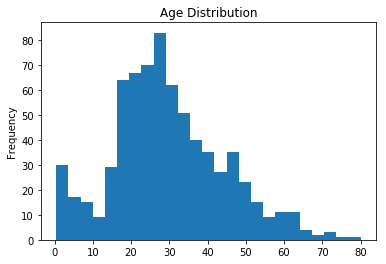

In [88]:
df.Age.plot(kind='hist', title='Age Distribution', bins=25);

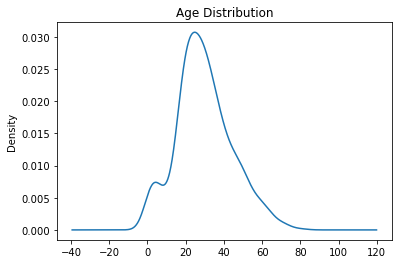

In [89]:
df.Age.plot(kind='kde', title='Age Distribution');

In [90]:
age_skew = df.Age.skew()
print('Age skew: {0:.2f}'.format(age_skew))

Age skew: 0.39


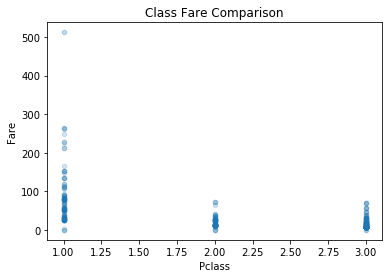

In [91]:
df.plot(kind='scatter', title='Class Fare Comparison', alpha=0.1, x='Pclass', y='Fare');

In [92]:
# Grouping
df.groupby(['Pclass'])['Age', 'Fare'].median()

,Age,Fare
Pclass,,
1,37.0,60.2875
2,29.0,14.2500
3,24.0,8.0500


In [93]:
# Grouping and specifying diferent aggregation methods
df.groupby(['Pclass']).agg({'Fare':'mean', 'Age':'median'})

,Fare,Age
Pclass,,
1,84.154687,37.0
2,20.662183,29.0
3,13.675550,24.0


In [94]:
aggregations = {
    'Fare': {
        'mean_fare': 'mean',
        'max_fare': max,
        # You can use numpy too!
        'min_fare': np.min
    },
    'Age': {
        'median_age': 'median',
        'oldest_passenger': max,
        'youngest_passenger': min
    }
}

df.groupby(['Pclass']).agg(aggregations)

Fare                           Age                   \
        mean_fare  max_fare min_fare median_age oldest_passenger   
Pclass                                                             
1       84.154687  512.3292      0.0       37.0             80.0   
2       20.662183   73.5000      0.0       29.0             70.0   
3       13.675550   69.5500      0.0       24.0             74.0   

                           
       youngest_passenger  
Pclass                     
1                    0.92  
2                    0.67  
3                    0.42

In [95]:
# Cross tabs, notice this uses a pandas function not a data frame!
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


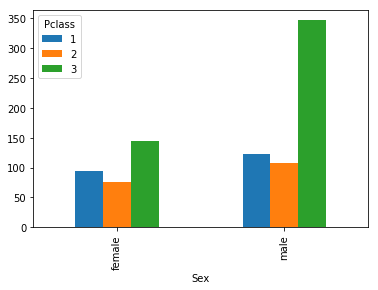

In [96]:
pd.crosstab(df.Sex, df.Pclass).plot(kind='bar');

In [113]:
# Semicolon will supress the tabular format, placing return value in a variable will too...
df.pivot_table(index='Sex', columns='Pclass', values='Age', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


In [101]:
df.groupby(['Sex', 'Pclass']).Age.mean()

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [102]:
df.groupby(['Sex', 'Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589


In [107]:
# Handle missing values
titanic_test_data = os.path.join(raw_data_loc, 'test.csv')
df2 = pd.read_csv(titanic_test_data)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [115]:
df2[df2.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [130]:
median_3rd_class_fare = df2.loc[(df2.Pclass == 3) & (df2.Embarked == 'S'), 'Fare'].median()
print('Median 3rd class fare: {0:.2f}'.format(median_3rd_class_fare))

df2.Fare.fillna(median_3rd_class_fare, inplace=True)
df2.info()

Median 3rd class fare: 8.05
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [129]:
# Bitwise And
print(True & True)
print(False & True)
print(True & False)
print(False & False)

True
False
False
False


In [131]:
pd.options.display.max_rows = 20
df2[df2.Age.isnull()]

# df2.loc[df2.Age.isnull(), 'Age'] = -1
# df2.Age.fillna(-1, inplace=True)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
39,931,3,"Hee, Mr. Ling",male,NaN,0,0,1601,56.4958,NaN,S
41,933,1,"Franklin, Mr. Thomas Parham",male,NaN,0,0,113778,26.5500,D34,S
47,939,3,"Shaughnessy, Mr. Patrick",male,NaN,0,0,370374,7.7500,NaN,Q
54,946,2,"Mangiavacchi, Mr. Serafino Emilio",male,NaN,0,0,SC/A.3 2861,15.5792,NaN,C
58,950,3,"Davison, Mr. Thomas Henry",male,NaN,1,0,386525,16.1000,NaN,S


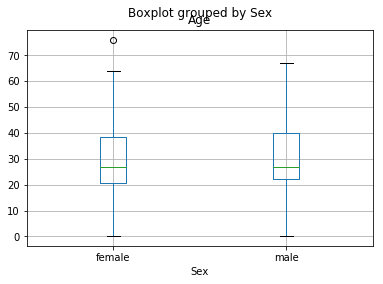

In [133]:
df2[df2.Age.notnull()].boxplot('Age', 'Sex');

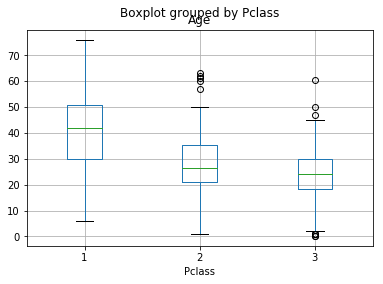

In [134]:
df2[df2.Age.notnull()].boxplot('Age', 'Pclass');

In [144]:
def group_title(title):
    groupings = {
        'mr': 'mr',
        'mrs': 'mrs',
        'miss': 'miss',
        'master': 'master',
        'don': 'sir',
        'rev': 'officer',
        'dr': 'officer',
        'mme': 'mrs',
        'ms': 'miss',
        'major': 'officer',
        'lady': 'lady',
        'sir': 'sir',
        'mlle': 'miss',
        'col': 'officer',
        'capt': 'officer',
        'jonkheer': 'sir',
        'the countess': 'lady',
        'dona': 'lady'
    }
    
    return groupings[title]

get_title = lambda name: group_title(name.split(',')[1].split('.')[0].strip().lower())

df2.Name.map(get_title).unique()

array(['mr', 'mrs', 'miss', 'master', 'officer', 'lady'], dtype=object)

In [145]:
# Create a new feature (category)
df2['Title'] = df2.Name.map(get_title)
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,mrs


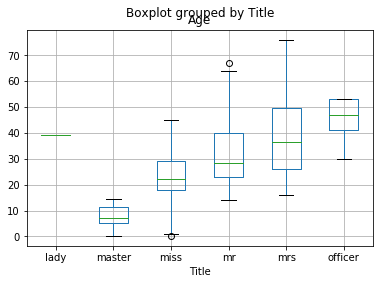

In [146]:
df2[df2.Age.notnull()].boxplot('Age', 'Title');

In [151]:
median_age_x_title = df2.groupby('Title').Age.transform('median')
df2.Age.fillna(median_age_x_title, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


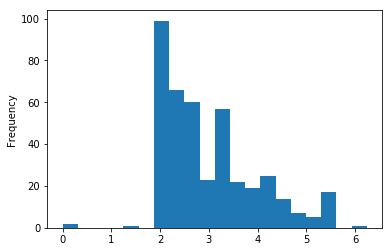

In [152]:
# Adjust skewness
log_fare = np.log(df2.Fare + 1.00)
log_fare.plot(kind='hist', bins=20)

In [157]:
# binning to handle outliers AKA DISCREET CATEGORIZATION
pd.qcut(df2.Fare, 4)

0             [0, 7.896]
1             [0, 7.896]
2        (7.896, 14.454]
3        (7.896, 14.454]
4        (7.896, 14.454]
5        (7.896, 14.454]
6             [0, 7.896]
7       (14.454, 31.472]
8             [0, 7.896]
9       (14.454, 31.472]
             ...        
408           [0, 7.896]
409      (7.896, 14.454]
410           [0, 7.896]
411    (31.472, 512.329]
412           [0, 7.896]
413      (7.896, 14.454]
414    (31.472, 512.329]
415           [0, 7.896]
416      (7.896, 14.454]
417     (14.454, 31.472]
Name: Fare, dtype: category
Categories (4, object): [[0, 7.896] < (7.896, 14.454] < (14.454, 31.472] < (31.472, 512.329]]

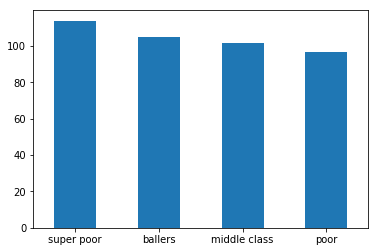

In [164]:
pd.qcut(df2.Fare, 4, labels=['super poor', 'poor', 'middle class', 'ballers']).value_counts().plot(kind='bar', rot=0);

In [167]:
df2['FareBins'] = pd.qcut(df2.Fare, 4, labels=['super poor', 'poor', 'middle class', 'ballers'])

In [168]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null object
Fare_Bins      418 non-null category
FareBins       418 non-null category
dtypes: category(2), float64(2), int64(4), object(6)
memory usage: 40.1+ KB


# Feature Engineering
- Domian experise allows you to build features that others will not see

In [170]:
# Age state (adult or child) kids were likely given lifenboat priority and so they would be more likely to survive
df2['AgeState'] = np.where(df2['Age'] >= 18, 'Adult', 'Child')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null object
Fare_Bins      418 non-null category
FareBins       418 non-null category
AgeState       418 non-null object
dtypes: category(2), float64(2), int64(4), object(7)
memory usage: 43.4+ KB


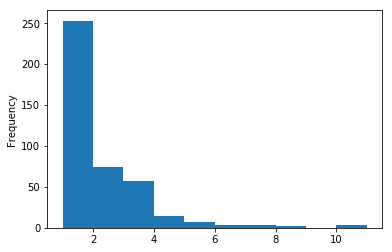

In [172]:
# Add a family size feature
# parents + sibs + self
df2['FamilySize'] = df2.Parch + df2.SibSp + 1
df2['FamilySize'].plot(kind='hist');

In [174]:
df2.loc[df2.FamilySize == df2.FamilySize.max(), ['Name', 'FamilySize', 'Ticket']]

,Name,FamilySize,Ticket
188,"Sage, Miss. Ada",11,CA. 2343
342,"Sage, Mr. John George",11,CA. 2343
360,"Sage, Master. William Henry",11,CA. 2343
365,"Sage, Mrs. John (Annie Bullen)",11,CA. 2343


In [178]:
# Add mother feature to see if being a mom increaeds survival chance
df2['IsMother'] = np.where(((df2.Sex == 'female') & (df2.Parch > 0) & (df2.Age > 18) & (df2.Title != 'Miss')), 1, 0)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null object
Fare_Bins      418 non-null category
FareBins       418 non-null category
AgeState       418 non-null object
FamilySize     418 non-null int64
IsMother       418 non-null int64
dtypes: category(2), float64(2), int64(6), object(7)
memory usage: 49.9+ KB


In [179]:
df2.Cabin.unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116', 'F',
       'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22', 'B10',
       'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64', 'A11',
       'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89', 'F E46',
       'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78', 'F E57', 'F2',
       'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60', 'E50', 'E39 E41',
       'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7', 'D40', 'D38',
       'C105'], dtype=object)

In [195]:
# Delete a feature
# df2.drop('Fare_Bins', axis=1, inplace=True)
df2.loc[(df2.Cabin == 'F') | (df2.Cabin == 'D')]
df2.loc[(df2.Cabin == 'F') | (df2.Cabin == 'D')] = np.NaN
# Create deck feature
df2 ['Deck'] = df2['Cabin'].map(lambda x : np.where(pd.notnull(x), str(x)[0].upper(), 'Z'))
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
PassengerId    416 non-null float64
Pclass         416 non-null float64
Name           416 non-null object
Sex            416 non-null object
Age            416 non-null float64
SibSp          416 non-null float64
Parch          416 non-null float64
Ticket         416 non-null object
Fare           416 non-null float64
Cabin          89 non-null object
Embarked       416 non-null object
Title          416 non-null object
FareBins       416 non-null category
AgeState       416 non-null object
FamilySize     416 non-null float64
IsMother       416 non-null float64
Deck           418 non-null object
dtypes: category(1), float64(8), object(8)
memory usage: 52.8+ KB


# Categorical Feature Encoding
- binary ecoding - IE male/female = 0/1
- label encoding - IE low/medium/high = 1/2/3 (ordinal)
- one-hot encoding - create a feature for each unique non-ordinal value, IE Embarkment point Is_S (S. Hampton), Is_C (some other place), Is_X (unknown)

|label|Is_S|Is_C|Is_X|
|-----|----|----|----|
|S    |1   |0   |0   |
|C    |0   |1   |0   |
|X    |0   |0   |1   |

In [198]:
# binary encode IsMale feature
df2['IsMale'] = np.where(df2.Sex == 'male', 1,0)
# One-hot ecode categories in one shot!
df2 = pd.get_dummies(df2, columns=['Deck', 'Pclass', 'Title', 'FareBins', 'Embarked', 'AgeState'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 38 columns):
PassengerId              416 non-null float64
Name                     416 non-null object
Sex                      416 non-null object
Age                      416 non-null float64
SibSp                    416 non-null float64
Parch                    416 non-null float64
Ticket                   416 non-null object
Fare                     416 non-null float64
Cabin                    89 non-null object
FamilySize               416 non-null float64
IsMother                 416 non-null float64
IsMale                   418 non-null int64
Deck_A                   418 non-null uint8
Deck_B                   418 non-null uint8
Deck_C                   418 non-null uint8
Deck_D                   418 non-null uint8
Deck_E                   418 non-null uint8
Deck_F                   418 non-null uint8
Deck_G                   418 non-null uint8
Deck_Z                   418 non-null uint

In [208]:
# df2.drop(['Name', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Ticket'], axis=1, inplace=True)
df2.drop(['Ticket'], axis=1, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 32 columns):
PassengerId              416 non-null float64
Age                      416 non-null float64
Fare                     416 non-null float64
FamilySize               416 non-null float64
IsMother                 416 non-null float64
IsMale                   418 non-null int64
Deck_A                   418 non-null uint8
Deck_B                   418 non-null uint8
Deck_C                   418 non-null uint8
Deck_D                   418 non-null uint8
Deck_E                   418 non-null uint8
Deck_F                   418 non-null uint8
Deck_G                   418 non-null uint8
Deck_Z                   418 non-null uint8
Pclass_1.0               418 non-null uint8
Pclass_2.0               418 non-null uint8
Pclass_3.0               418 non-null uint8
Title_lady               418 non-null uint8
Title_master             418 non-null uint8
Title_miss               418 non-null uint8
Title

In [210]:
# Reorder columns
cols = [col for col in df2.columns if col != 'IsMother']
cols = ['IsMother'] + cols
df2 = df2[cols]

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 32 columns):
IsMother                 416 non-null float64
PassengerId              416 non-null float64
Age                      416 non-null float64
Fare                     416 non-null float64
FamilySize               416 non-null float64
IsMale                   418 non-null int64
Deck_A                   418 non-null uint8
Deck_B                   418 non-null uint8
Deck_C                   418 non-null uint8
Deck_D                   418 non-null uint8
Deck_E                   418 non-null uint8
Deck_F                   418 non-null uint8
Deck_G                   418 non-null uint8
Deck_Z                   418 non-null uint8
Pclass_1.0               418 non-null uint8
Pclass_2.0               418 non-null uint8
Pclass_3.0               418 non-null uint8
Title_lady               418 non-null uint8
Title_master             418 non-null uint8
Title_miss               418 non-null uint8
Title

In [212]:
# Save data using pandas
processed_path = os.path.join(os.path.pardir, 'data', 'processed')
save_train_path = os.path.join(processed_path, 'train.csv')
save_test_path = os.path.join(processed_path, 'test.csv')

In [214]:
df2.loc[df2.Age < 10].to_csv(save_test_path)

In [215]:
# A magic technique to write files without a bunch of hassle.
file_loc = os.path.join(os.path.pardir, 'util', 'test.py')

In [216]:
%%writefile $file_loc

print('hello world')

Writing ../util/test.py


# Matplotlib

In [217]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([  17.,   19.,   86.,  139.,   65.,   40.,   22.,   20.,    9.,    1.]),
 array([ -1. ,   6.7,  14.4,  22.1,  29.8,  37.5,  45.2,  52.9,  60.6,
         68.3,  76. ]),
 <a list of 10 Patch objects>)

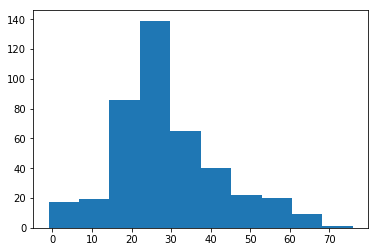

In [222]:
plt.hist(df2.Age)


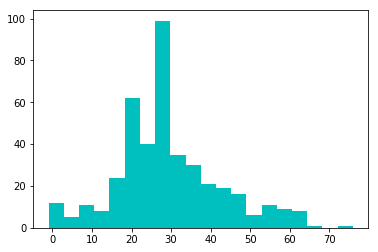

In [225]:
plt.hist(df2.Age, bins=20, color='c')
# hides meta data like a semicolon
plt.show()

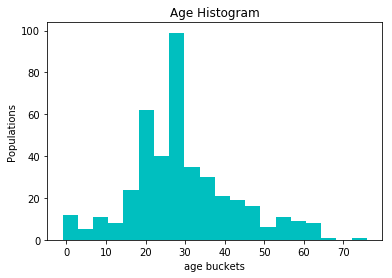

In [226]:
plt.hist(df2.Age, bins=20, color='c')
plt.title('Age Histogram')
plt.xlabel('age buckets')
plt.ylabel('Populations')
plt.show()

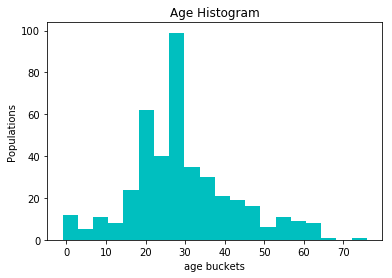

In [232]:
f, ax = plt.subplots()
# fix age inline
ax.hist(df2.Age.map(lambda x : x if x != np.NaN else -1), bins=20, color='c')
ax.set_title('Age Histogram')
ax.set_xlabel('age buckets')
ax.set_ylabel('Populations')
plt.show()

In [238]:
#Fixed null fares
# df2.loc[df2.Fare.isnull(), 'Fare'] = -1

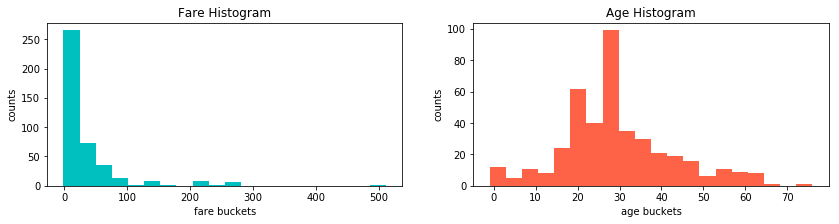

In [239]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,3))
ax1.hist(df2.Fare.map(lambda x : x if x != np.NaN else -1), bins=20, color='c')
ax1.set_title('Fare Histogram')
ax1.set_xlabel('fare buckets')
ax1.set_ylabel('counts')

# fix age inline
ax2.hist(df2.Age.map(lambda x : x if x != np.NaN else -1), bins=20, color='tomato')
ax2.set_title('Age Histogram')
ax2.set_xlabel('age buckets')
ax2.set_ylabel('counts')
plt.show()

In [ ]:
# Plot Grids
You can create many more visualizations using array axis

```python
    # subplot params are row, cols
    f, ax_arr = plot.subplots(3,2, figsize=(14,7))
    # access axis by 2d array cords
    ax_rr[0,0].hist(df2.Fare, bins=20, color='c')
    # add padding
    plt.tight_
```